# Actividad 06: Generación de imágenes con Autoencoders y GMM

En esta actividad vamos a trabajar con el _dataset_ Fashion MNIST, un _dataset_ de imágenes de $28\times28$ en blanco y negro de prendas de ropa. Son 10 tipos de prendas en total (para una referencia mira [acá](https://github.com/zalandoresearch/fashion-mnist)). 

En esta actividad vas a generar imagenes nuevas gracias al modelo GMM. A grandes rasgos tendrás que:

- Entrenar un _Autoencoder_ que aprenda a reducir la dimensionalidad del _dataset_ Fashion MNIST.
- Usar GMM para encontrar _clusters_ para la versión reducida del _dataset_.
- Usar las distribuciones encontradas con GMM para generar nuevas instancias (con la dimensión de la reducción).
- Tomar las instancias nuevas y llevarlas a la dimensión original, para luego visualizar estas instancias.

La idea es que las imagenes generadas parezcan venir del _dataset_ original, a pesar de que sean completamente nuevas.

## Parte 1:  reducción de dimensionalidad

En la primera parte vas a tener que entrenar un _autoencoder_ que reduce las imágenes a 6 dimensiones. La arquitectura (número de capas, neuronas por capa) la tienes que escoger tú. Te recomendamos probar con la arquitectura vista en clases que tiene una función de activación `selu`. Para entrenar la reducción de dimensionalidad usa las últimas $10,000$ imágenes del _dataset_.

Una vez entrenado, toma algunas imágenes que el _autoencoder_ no haya visto en el entrenamiento (es decir, que estén entre las primeras $60,000$ imágenes. Comprimelas con el _encoder_, descomprime con el _decoder_ y visualizalas para _checkear_ que tu _autoencoder_ funciona razonablemente bien. 

Finalmente, crea un _dataset_ llamado `X_auto`, que tiene que ser igual a la reducción de dimensionalidad de las últimas $10,000$ imágenes del _dataset_ Fashion MNIST con el _encoder_. **Ojo**: recuerda que siempre es buena idea estandarizar los datos. Además, puede que haya ciertos tipos de imágenes que no funcionen tan bien como otras. Lo ideal es probar con una imagen de cada tipo, pero no es necesario.

## Parte 2: clustering y generación de nuevas imágenes 

Toma el _dataset_ `X_auto` y entrena un modelo GMM, indicando que queremos encontrar 10 clusters. Luego de esto, obtiene el vector de media y la matriz de covarianza para cada una de las distribuciones encontradas. Para hacer esto, puedes ver la [documentación oficial](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), aunque la idea es la siguiente:

```Python
# ...
gmm = GaussianMixture(n_components=10, n_init=5).fit(X_auto)

# ...

# Lista de vectores de medias
gmm.means_

# Matrices de covarianza
gmm.covariances_
```

Ahora, vamos a generar nuevas instancias usando estos datos. Usa

```
np.random.multivariate_normal(mean_vector, covariance_matrix)
```

Para generar un elemento de la normal multivariada con el vector de media `mean_vector` y la matriz de covarianza `covariance_matrix`. Así, obtén dos elementos generados para cada una de las 10 gaussianas que encontraste con GMM.

## Parte 3: análisis  

Cada elemento generado puede ser graficado como imagen. Para esto, hay que pasarlo por el decodificador como vimos en clases. Así, analiza visualmente los dos elementos que generaste por gaussiana.

Luego, toma la media de cada una de las gaussianas, y transforma cada una de estas medias en una imagen de $28\times28$. Visualiza cada uno de los vectores de medias.

Ahora, considerando todas las visualizaciones de esta parte, responde: ¿qué _clusters_ parece entregar consistentemente prendas de un tipo en específico? ¿qué tipos de prendas son?

### Detalles académicos

La entrega de esta actividad debe ser un archivo comprimido donde se encuentre un Jupyter Notebook, junto a cualquier archivo que estés llamando desde tu código. La fecha de entrega es hasta el sábado 11 de diciembre hasta las 23:59, en el buzón correspondiente de Webcursos.

## Desarrollo

Comienza a desarrollar tu actividad desde aquí. Para ayudar, vamos a cargar el _dataset_ y vamos a mostrar cómo hacer varias visualizaciones en una celda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

Vamos a descargar el _dataset_ y nos quedamos con las $10,000$ últimas filas.

In [2]:
mnist = fetch_openml("Fashion-MNIST", version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X_sample = X[60000:]
y_sample = y[60000:]

X_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 60000 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 59.8 MB


### Mostrando una foto
Para mostrar las fotos, tenemos que volver a formato de 28x28 píxeles

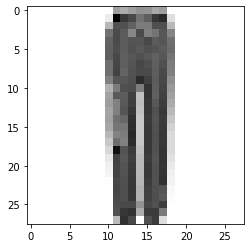

In [4]:
# Vamos a obtener la instancia número 1000 del dataset original

some_item = X.iloc[1000]
some_item_image = some_item.values.reshape(28,28)

plt.imshow(some_item_image, cmap="binary")
plt.show()

Ahora para visualizar más de una prenda por celda hacemos lo siguiente.

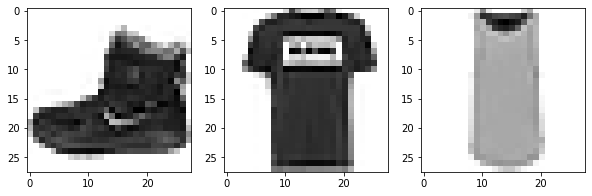

In [5]:
# Queremos una grilla de una fila y tres columnas
fig, axes = plt.subplots(1, 3, figsize=(10,10))

some_item_0 = X.iloc[0]
some_item_1 = X.iloc[1]
some_item_2 = X.iloc[2]

some_item_0_img = some_item_0.values.reshape(28, 28)
some_item_1_img = some_item_1.values.reshape(28, 28)
some_item_2_img = some_item_2.values.reshape(28, 28)

axes[0].imshow(some_item_0_img, cmap="binary")
axes[1].imshow(some_item_1_img, cmap="binary")
axes[2].imshow(some_item_2_img, cmap="binary")

plt.show()

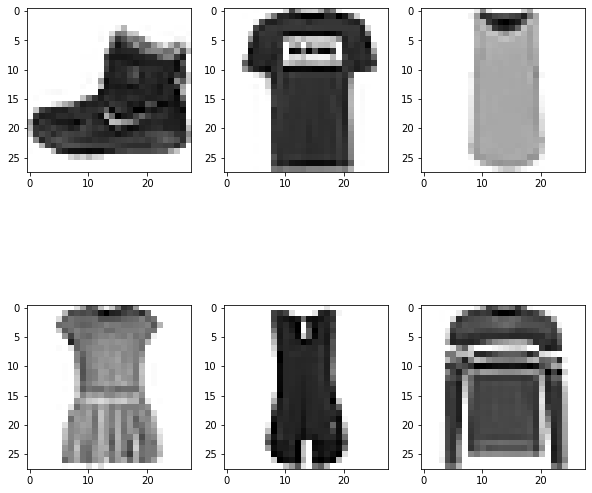

In [6]:
# Queremos una grilla de dos filas y tres columnas
fig, axes = plt.subplots(2, 3, figsize=(10,10))

some_item_0 = X.iloc[0]
some_item_1 = X.iloc[1]
some_item_2 = X.iloc[2]
some_item_3 = X.iloc[3]
some_item_4 = X.iloc[4]
some_item_5 = X.iloc[5]

some_item_0_img = some_item_0.values.reshape(28, 28)
some_item_1_img = some_item_1.values.reshape(28, 28)
some_item_2_img = some_item_2.values.reshape(28, 28)
some_item_3_img = some_item_3.values.reshape(28, 28)
some_item_4_img = some_item_4.values.reshape(28, 28)
some_item_5_img = some_item_5.values.reshape(28, 28)

axes[0][0].imshow(some_item_0_img, cmap="binary")
axes[0][1].imshow(some_item_1_img, cmap="binary")
axes[0][2].imshow(some_item_2_img, cmap="binary")
axes[1][0].imshow(some_item_3_img, cmap="binary")
axes[1][1].imshow(some_item_4_img, cmap="binary")
axes[1][2].imshow(some_item_5_img, cmap="binary")

plt.show()

Ahora corresponda que sigas tú.